### Train, publish and use image detection model with Azure Custom Vision
This is second part which describes how to use API of trained model for object detection.
To see how to use API for upload taged images to Azure Custom Vision Studio project before model training refer to part1 (az_image_detection1.ipynb). <br>
The lab is based on [this](https://microsoftlearning.github.io/mslearn-ai-vision/Instructions/Exercises/03-custom-vision-object-detection.html) Microsoft learn manual.

In [ ]:
%pip install azure-cognitiveservices-vision-customvision==3.1.1

In [2]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
from dotenv import load_dotenv

# Get Configuration Settings
load_dotenv()
prediction_endpoint = os.getenv('PREDICTION_ENDPOINT')
prediction_key = os.getenv('PREDICTION_KEY')
project_id = os.getenv('PROJECT_ID')
model_name = os.getenv('MODEL_NAME')
print(f'Prediction Endpoint: {prediction_endpoint}')

Prediction Endpoint: https://customvision536-prediction.cognitiveservices.azure.com/


In [3]:
# Authenticate a client for the training API
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
prediction_client = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [17]:
# Load image and get height, width and channels
image_url = os.path.join (os.getcwd(), "data", "test-images", "produce.jpg")
image = Image.open(image_url)
h, w, ch = np.array(image).shape

print(f'Image size: {w}x{h}')

Image size: 1024x768


In [6]:
# Detect objects in the test image
with open(image_url, mode="rb") as image_data:
    results = prediction_client.detect_image(project_id, model_name, image_data)

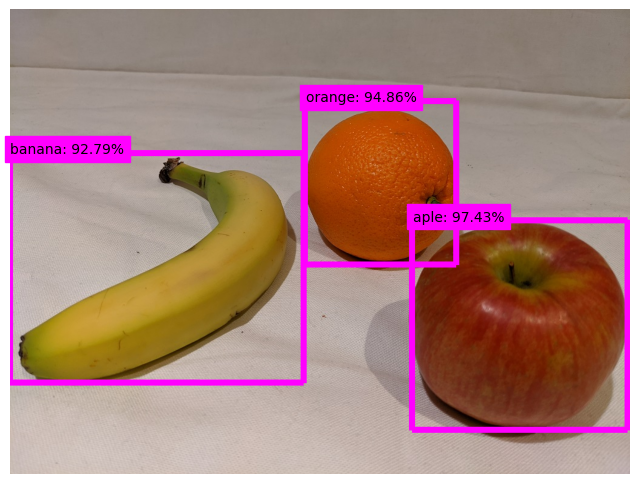

In [15]:
# Create a figure for the results
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# Display the image with boxes around each detected object
draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'
for prediction in results.predictions:
    # Only show objects with a > 50% probability
    if (prediction.probability*100) > 50:
        # Box coordinates and dimensions are proportional - convert to absolutes
        left = prediction.bounding_box.left * w 
        top = prediction.bounding_box.top * h 
        height = prediction.bounding_box.height * h
        width =  prediction.bounding_box.width * w
        # Draw the box
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        # Add the tag name and probability
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(image)

In [16]:
# Save the image with boxes around detected objects
image_url = os.path.join (os.getcwd(), "data", "output", "detected_images.jpg")
fig.savefig(image_url)
print('Results saved in ', image_url)

Results saved in  c:\DY\Programming\Azure-AI\Azure-AI\data\output\detected_images.jpg
